# The Discovery of Handwashing 

**Ignaz Philipp Semmelweis** was a Hungarian physician and scientist who was described as the saviour of mothers and the early pioneer of antiseptic procedures. He proposed the practise of handwashing with chlorinated lime solutions in 1847 while working in Vienna General Hospital as a means to reduce childbed fever. We will be exploring the impact this method had on the birth and death rate in data provided.

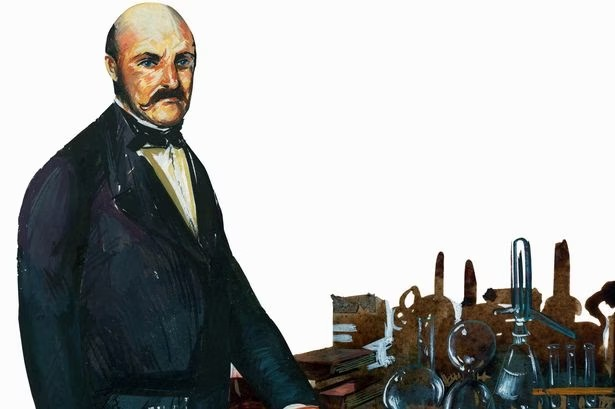

In [15]:
library(dplyr)

library(readr)

library(ggplot2); theme_set(theme_minimal())

## Loading the dataset


clinic_data <- read_csv("clinic_data.csv") 

hospital_data <- read_csv("hospital_data.csv")

### Checking the structure of the data 

glimpse(clinic_data) 

glimpse(hospital_data)

Creating a calculated death ratio column (deaths/births) 

In [16]:
# death ratio 

clinic_data <- clinic_data %>% 
  group_by(clinic) %>% 
  mutate(death_ratio = deaths/births)

hospital_data <- hospital_data %>% 
  group_by(hospital) %>% 
  mutate(death_ratio = deaths/births)

Clinic data

In [17]:
head(clinic_data, 3)

year,births,deaths,clinic,death_ratio
1833,3737,197,clinic_1,0.05271608
1834,2657,205,clinic_1,0.07715469
1835,2573,143,clinic_1,0.05557715


hospital data

In [18]:
head(hospital_data, 3)

year,births,deaths,hospital,death_ratio
1784,1261,11,Dublin,0.008723236
1785,1292,8,Dublin,0.006191950
1786,1351,8,Dublin,0.005921540


## Investigating deaths before handwashing was introduced in 1847

In [19]:
clinic_deaths_prehandwashing <- clinic_data %>% 
  filter(year < 1847) %>% 
  group_by(clinic) %>% 
  summarise(avg_deaths = mean(death_ratio)) #clinic deaths prehandwashing

clinic_deaths_all_years <- clinic_data %>% 
  group_by(clinic) %>% 
  summarise(avg_deaths = mean(death_ratio)) #clinic deaths for all the years

In [20]:
clinic_deaths_prehandwashing

clinic_deaths_all_years

clinic,avg_deaths
clinic_1,0.07993925
clinic_2,0.04787381


clinic,avg_deaths
clinic_1,0.05938787
clinic_2,0.04021851


The average death was higher prehandwashing

### Doctors began performing pathological autopsies at Vienna hospital in 1823

We compare the average death for Vienna Hospital where autopsies are performed with Dublin and Rotunda Hospital where it was not.


In [21]:
hospital_autopsy_introduced <- hospital_data %>% 
  filter(hospital == "Vienna") %>% # Filter for only vienna hospital
  mutate(autopsy_introduced = year > 1823) %>% 
  group_by(autopsy_introduced) %>% 
  summarise(avg_deaths = mean(death_ratio))

hospital_autopsy_introduced

autopsy_introduced,avg_deaths
FALSE,0.01323155
TRUE,0.05815028


For hospitals in Vienna, the average death was higher in hospital that perform autopsy as compared to those that don't.

In [22]:
all_hospital_autopsy_introduced

autopsies_introduced,avg_rate
FALSE,0.01125877
TRUE,0.03660768


The average death across all hospitals that perform autopsy shows a higher value than the ones that don't

## Making Sense of Everything With Visualisation

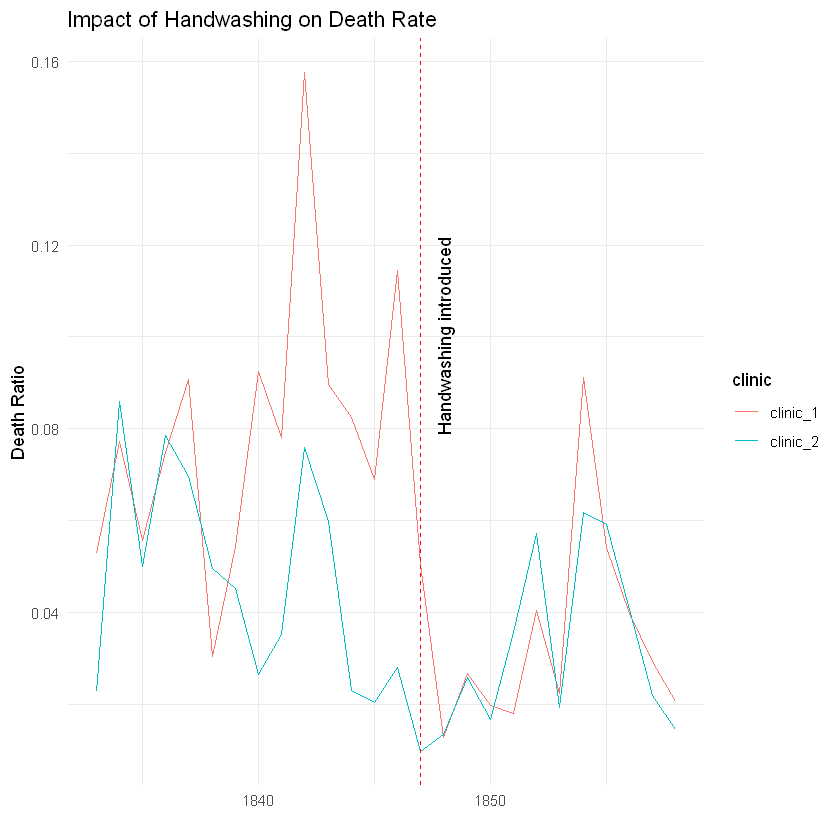

In [23]:
handwashing_introduced <- 1847 # handwashing was introduced

clinic_data %>% 
  ggplot(aes(year, death_ratio, colour = clinic)) +
  geom_line() +
  geom_vline(xintercept = handwashing_introduced, linetype = "dashed",
             colour = "red") +
  annotate("text", x = 1848, y = 0.1, label = "Handwashing introduced",
           angle = 90) +
  labs(title = "Impact of Handwashing on Death Rate", x = "",
       y = "Death Ratio")

The death rate drastically reduced afeter handwashing was reduced. This validate that handwashing using antiseptic before entering delivery rooms is a good practise.

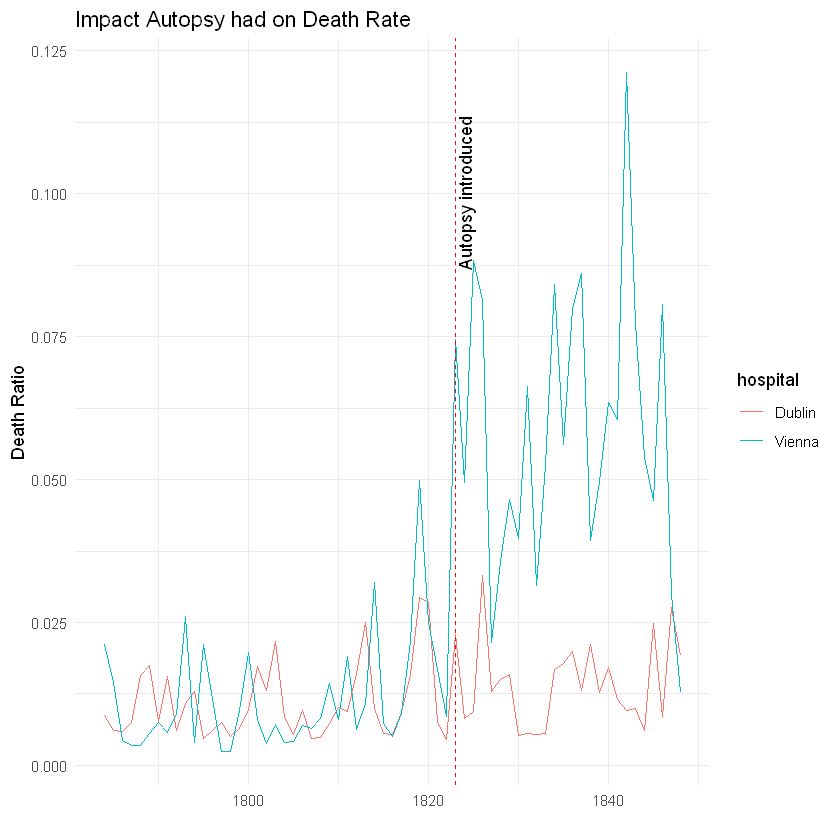

In [24]:
autopsy_introduced <- 1823 #Autopsy was introduced

hospital_data %>% 
  ggplot(aes(year, death_ratio, colour = hospital)) +
  geom_line() +
  geom_vline(xintercept = autopsy_introduced, linetype = "dashed",
             colour = "red") +
  annotate("text", x = 1824, y = 0.1, label = "Autopsy introduced",
           angle = 90) +
  # annotate("text", x = 1848, y = 0.1, label = "Handwashing introduced",
           # angle = 90)
  labs(title = "Impact Autopsy had on Death Rate", x = "",
       y = "Death Ratio")

In [ ]:
For feedback please email me write.ethereal@gmail.com

🚀Thanks